<a href="https://colab.research.google.com/github/NadaNamaniZitouni/Kidney-disease-prediction/blob/main/project_part2_recreating_the_results_of_the_second_Article_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook we will try to recreate the expreriments of the first article "Boosted Classifier and Features Selection for Enhancing Chronic Kidney Disease Diagnose" and try to get better results

In [ ]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# this segment is reserved for usage on google colab
# it is used to be able to import the data
from google.colab import files
uploaded = files.upload()

Saving csv_result-chronic_kidney_disease.csv to csv_result-chronic_kidney_disease.csv


In [ ]:
dataset = read_csv("csv_result-chronic_kidney_disease.csv")
dataset.head()

,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr',...,'wbcc','rbcc','htn','dm','cad','appet','pe','ane','class',Unnamed: 25
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,7800,5.2,yes,yes,no,good,no,no,ckd,NaN
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,6000,?,no,no,no,good,no,no,ckd,NaN
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,7500,?,no,yes,no,poor,no,yes,ckd,NaN
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,NaN
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,7300,4.6,no,no,no,good,no,no,ckd,NaN


In [ ]:
#As the dataset was originally in .arff extention when converting to csv it automatically added an extra empty column to compensate for the issue it has with extra ,
# we will drop this extra column
dataset.drop(columns=dataset.columns[-1], 
        axis=1, 
        inplace=True)


In [ ]:
# let's take a look at the column names
dataset.columns

Index([''age'', ''bp'', ''sg'', ''al'', ''su'', ''rbc'', ''pc'', ''pcc'',
       ''ba'', ''bgr'', ''bu'', ''sc'', ''sod'', ''pot'', ''hemo'', ''pcv'',
       ''wbcc'', ''rbcc'', ''htn'', ''dm'', ''cad'', ''appet'', ''pe'',
       ''ane'', ''class''],
      dtype='object')

we can detect that there are extra '' on each column name




In [ ]:
# let's take care of the extra ''
dataset.columns = dataset.columns.str.replace("['']", "")

<ipython-input-6-38f7c09ee5e5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset.columns = dataset.columns.str.replace("['']", "")


In [ ]:
# let's take a look at the shape of the dataset
dataset.shape

(400, 25)

In [ ]:
# now let's make a copy of the dataset to conduct all the experiments on
ckd=dataset.copy()

In [ ]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wbcc    400 non-null    object
 17  rbcc    400 non-null    object
 18  htn     400 non-null    object
 19  dm      399 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    ob

In [ ]:
ckd.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,399,400,400,400,400,400
unique,77,11,6,7,7,3,3,3,3,147,...,43,90,46,3,3,3,4,4,3,3
top,60,80,1.02,0,0,normal,normal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,44,...,71,106,131,251,260,364,316,322,339,250


In [ ]:
# let's start by checking how many unique values does each feature have
for i in ckd.columns:
    print(f'{i} : {ckd[i].nunique()} values')

age : 77 values
bp : 11 values
sg : 6 values
al : 7 values
su : 7 values
rbc : 3 values
pc : 3 values
pcc : 3 values
ba : 3 values
bgr : 147 values
bu : 119 values
sc : 85 values
sod : 35 values
pot : 41 values
hemo : 116 values
pcv : 43 values
wbcc : 90 values
rbcc : 46 values
htn : 3 values
dm : 3 values
cad : 3 values
appet : 4 values
pe : 4 values
ane : 3 values
class : 3 values


In [ ]:
# let's separate our features into numerical and categorical features according to the dataset disciption
nominal_columns_list = []
numecial_columns_list = []

for i in ckd.columns:
    if ckd[i].nunique()>7:
        numecial_columns_list.append(i)
    else:
        nominal_columns_list.append(i)

In [ ]:
print('Numerical features: ', numecial_columns_list)
print('\nCategorical features: ', nominal_columns_list)

Numerical features:  ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

Categorical features:  ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']


### Let's take care of the numerical data

let's start by replacing all the '?' values by nans




In [ ]:
for i in numecial_columns_list:
  ckd[i] = ckd[i].replace('?',np.NaN)

In [ ]:
# Let's check if there are any specific unique values
for i in numecial_columns_list:
    print(f'{i} has {ckd[i].unique()} categories.\n')

age has ['48' '7' '62' '51' '60' '68' '24' '52' '53' '50' '63' '40' '47' '61' '21'
 '42' '75' '69' nan '73' '70' '65' '76' '72' '82' '46' '45' '35' '54' '11'
 '59' '67' '15' '55' '44' '26' '64' '56' '5' '74' '38' '58' '71' '34' '17'
 '12' '43' '41' '57' '8' '39' '66' '81' '14' '27' '83' '30' '4' '3' '6'
 '32' '80' '49' '90' '78' '19' '2' '33' '36' '37' '23' '25' '20' '29' '28'
 '22' '79'] categories.

bp has ['80' '50' '70' '90' nan '100' '60' '110' '140' '180' '120'] categories.

bgr has ['121' nan '423' '117' '106' '74' '100' '410' '138' '70' '490' '380' '208'
 '98' '157' '76' '99' '114' '263' '173' '95' '108' '156' '264' '123' '93'
 '107' '159' '140' '171' '270' '92' '137' '204' '79' '207' '124' '144'
 '91' '162' '246' '253' '141' '182' '86' '150' '146' '425' '112' '250'
 '360' '163' '129' '133' '102' '158' '165' '132' '104' '127' '415' '169'
 '251' '109' '280' '210' '219' '295' '94' '172' '101' '298' '153' '88'
 '226' '143' '115' '89' '297' '233' '294' '323' '125' '90' '308' '118'


In [ ]:
# let's check the number of missing values that each column has
for i in numecial_columns_list:
  print("the number of missing values for", i," is:", ckd[i].isnull().sum())
# lets check the sum of all nans on the dataset
print("the sum of all missing values on the dataset is: ", ckd.isnull().sum().sum())

the number of missing values for age  is: 9
the number of missing values for bp  is: 12
the number of missing values for bgr  is: 44
the number of missing values for bu  is: 19
the number of missing values for sc  is: 17
the number of missing values for sod  is: 87
the number of missing values for pot  is: 88
the number of missing values for hemo  is: 52
the number of missing values for pcv  is: 71
the number of missing values for wbcc  is: 106
the number of missing values for rbcc  is: 131
the sum of all missing values on the dataset is:  637


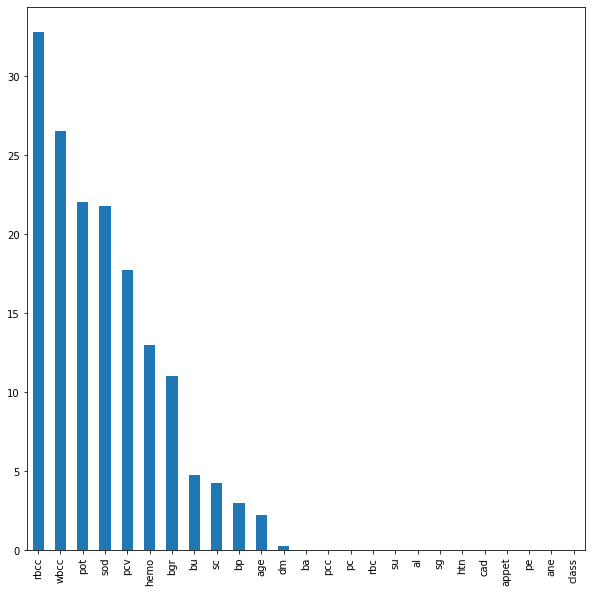

In [ ]:
# lets plot the percentage of the missing values

((ckd.isnull().sum()/ckd.shape[0])*100).sort_values(ascending=False).plot(kind='bar', figsize=(10,10))

now that have found our missing data we will start by changing the data types of each column accordingly and then filling out the missing data with the mean values of each columns as stipulated in the articles

In [ ]:
# let's start by changing the types of the features from object to float 
for i in numecial_columns_list:
    ckd[i] = pd.to_numeric(ckd[i], errors='coerce')

In [ ]:
# let's check the types 
ckd.dtypes

age      float64
bp       float64
sg        object
al        object
su        object
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [ ]:
# lets fill the nan values by the mean values as stipulaed in the articles
for i in numecial_columns_list:
    ckd[i] = ckd[i].fillna(ckd[i].mean())

In [ ]:
# let's check the number of missing values after the mean method has been applied to each column
for i in numecial_columns_list:
  print("the number of missing values for", i," is:", ckd[i].isnull().sum())

the number of missing values for age  is: 0
the number of missing values for bp  is: 0
the number of missing values for bgr  is: 0
the number of missing values for bu  is: 0
the number of missing values for sc  is: 0
the number of missing values for sod  is: 0
the number of missing values for pot  is: 0
the number of missing values for hemo  is: 0
the number of missing values for pcv  is: 0
the number of missing values for wbcc  is: 0
the number of missing values for rbcc  is: 0


In [ ]:
# let's visualize the dataframe at this point
ckd.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.02,1,0,?,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4,0,?,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2,3,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.01,2,0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


### Let's take care of the nominal data

In [ ]:
# we will use the mode function to choose the most prominent value to replace the '?' for each feature as mentionned in the article
for var in nominal_columns_list:
  ckd[var] = ckd[var].str.replace("?", ckd[var].mode()[0])

<ipython-input-23-2c8bf899e7ac>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ckd[var] = ckd[var].str.replace("?", ckd[var].mode()[0])


In [ ]:
# let's check the unique values
for var in nominal_columns_list:
        print(f"- {var} : ")
        print(ckd[var].value_counts())
        print("----------------------")

- sg : 
1.02     153
1.01      84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64
----------------------
- al : 
0    245
1     44
2     43
3     43
4     24
5      1
Name: al, dtype: int64
----------------------
- su : 
0    339
2     18
3     14
4     13
1     13
5      3
Name: su, dtype: int64
----------------------
- rbc : 
normal      353
abnormal     47
Name: rbc, dtype: int64
----------------------
- pc : 
normal      324
abnormal     76
Name: pc, dtype: int64
----------------------
- pcc : 
notpresent    358
present        42
Name: pcc, dtype: int64
----------------------
- ba : 
notpresent    378
present        22
Name: ba, dtype: int64
----------------------
- htn : 
no     253
yes    147
Name: htn, dtype: int64
----------------------
- dm : 
no     262
yes    137
Name: dm, dtype: int64
----------------------
- cad : 
no     366
yes     34
Name: cad, dtype: int64
----------------------
- appet : 
good    317
poor     82
no        1
Name: appet, dtype: int64
----

We can see that the '?' have been handled but there still a couple of issue with display of values such as for 'dm', 'appet', 'pe' and 'class'

In [ ]:
# let's change the abnormal values into appropriate ones
ckd["dm"] = ckd["dm"].fillna(ckd["dm"].mode()[0])
ckd['appet'] = ckd['appet'].str.replace('no', 'good')
ckd['pe'] = ckd['pe'].str.replace('good', 'no')
ckd['class'] = ckd['class'].replace('no', 'notckd')

### Let's check each feature distribution

Let's first check distribution of the numerical features

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

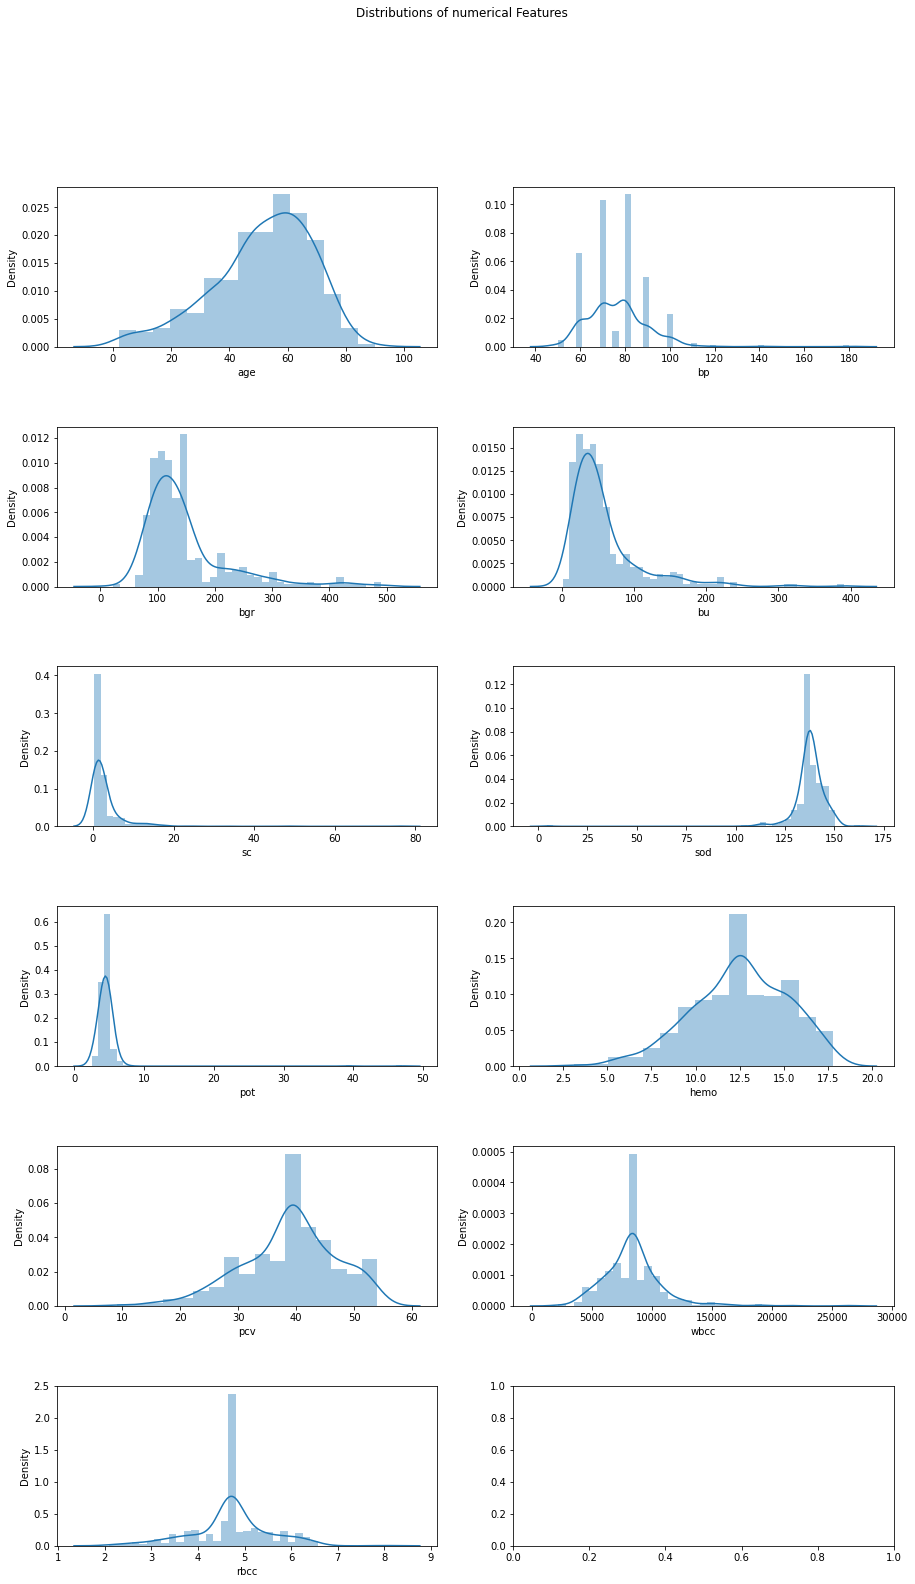

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15,25))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of numerical Features')


for i, j in zip(axes.flatten(), numecial_columns_list):
    sns.distplot(a=ckd[j], ax=i)

From these graphs we can make a couple of observations:
- age looks a bit skewed to the left
- bgr is right skewed
- bu is also a bit right skewed
- Rest of the features are lightly skewed.

We will have to standardize them and will check see their distributions

Let's also check the distribution for nominal data

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

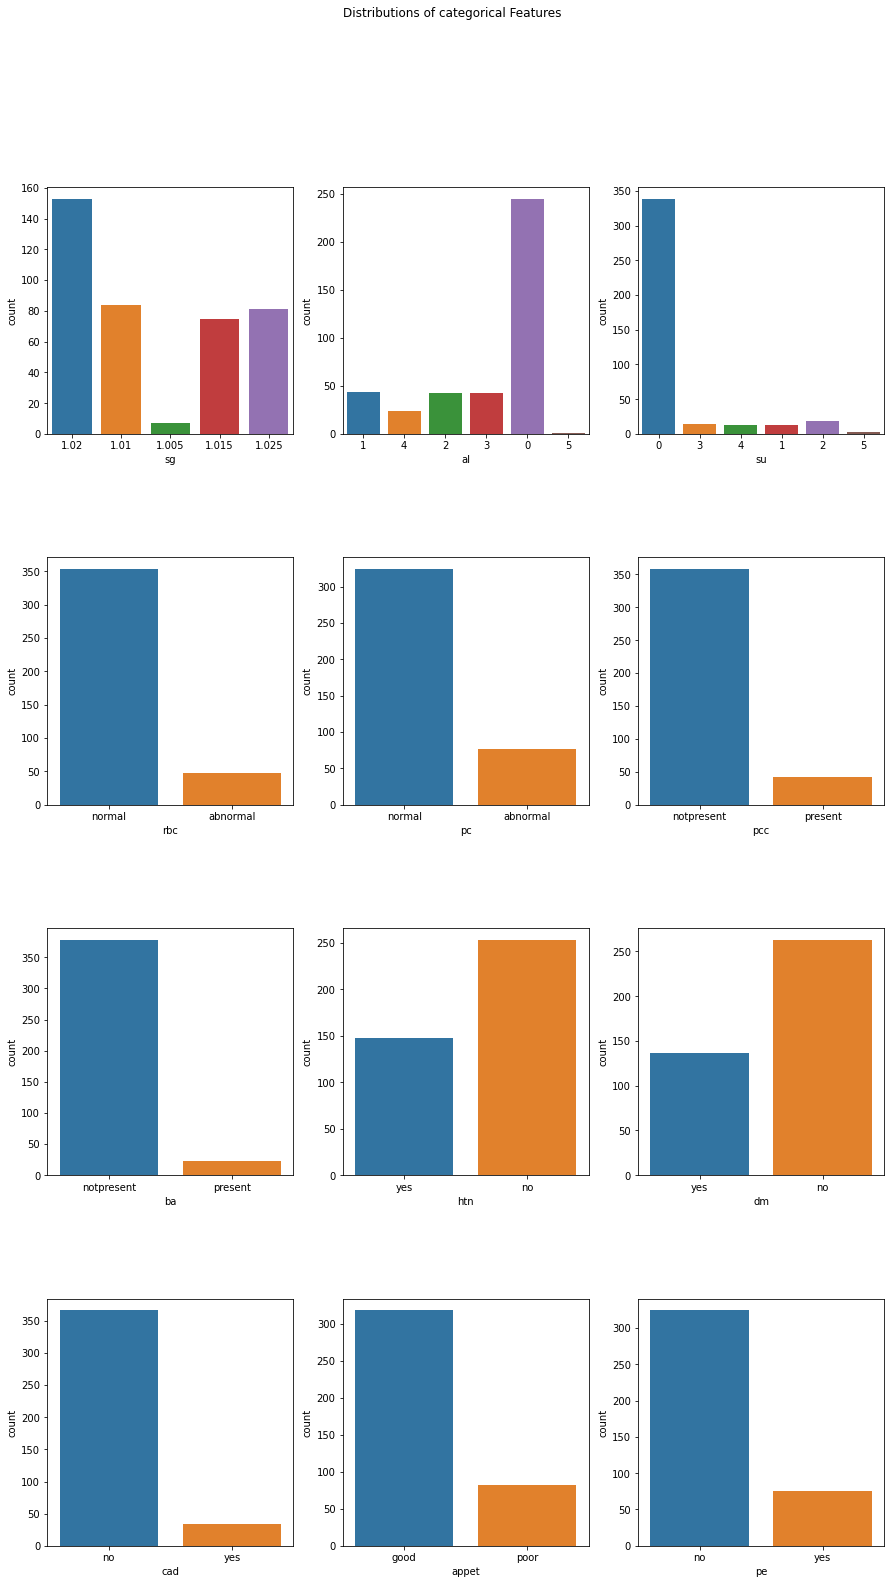

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,25))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of categorical Features')


for i, j in zip(axes.flatten(), nominal_columns_list):
    sns.countplot(ckd[j], ax=i)

We notice from these graphs that there is a lot of data imbalance in the categorical features, this means that during the cross validation we will have to use stratified folds which is also mentionned on the articles.

Since we have found data is imbalanced, lets explore the class feature a bit further

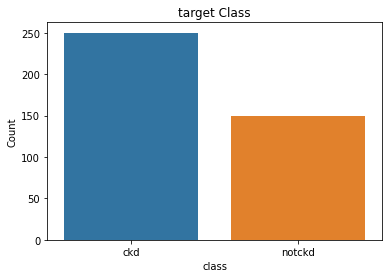

Percent of chronic kidney disease sample:  62.5 %
Percent of not a chronic kidney disease sample:  37.5 %


In [ ]:
sns.countplot(x='class',data=ckd)
plt.xlabel("class")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of chronic kidney disease sample: ',round(len(ckd[ckd['class']=='ckd'])/len(ckd['class'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(ckd[ckd['class']=='notckd'])/len(ckd['class'])*100,2),"%")

according to the percentages, we can determine that classes are not facing a huge data imbalance which is a good thing as it will help avoid problems such as model overfitting or underfitting during training

### Let's check the correlations between features 

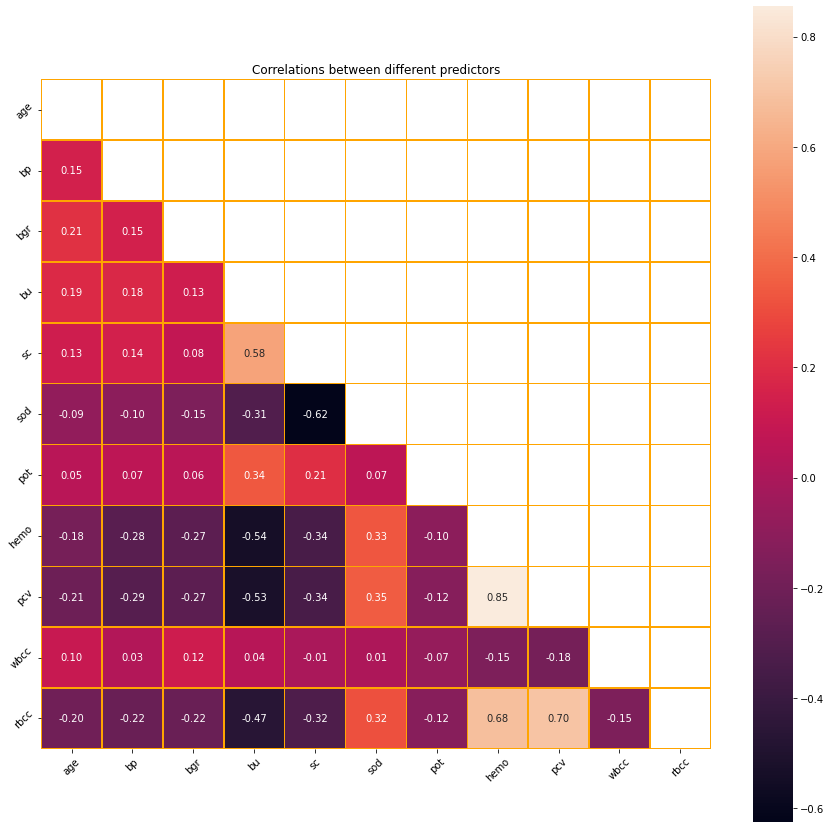

In [ ]:
corr_ckd = ckd.corr()
f,ax=plt.subplots(figsize=(15,15))
mask = np.zeros_like(corr_ckd)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_ckd,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange", mask = mask, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

We can notice the presence of both positive correlations and negative ones.

### Let's take care of the outliers that are usually only present on the numerical data

In the article, the only information that they provide for the outliers is that they will be "eliminating noise, such as outliers", from this information alone they either deleted them or changed the value. 
Since they were vague about it, in our work, we chose to change their value as the dataset is too small to take on the option of deleting information.

we can see in this dataset that most of the outliers will be in relation with the numerical data and that is what we will focus on 

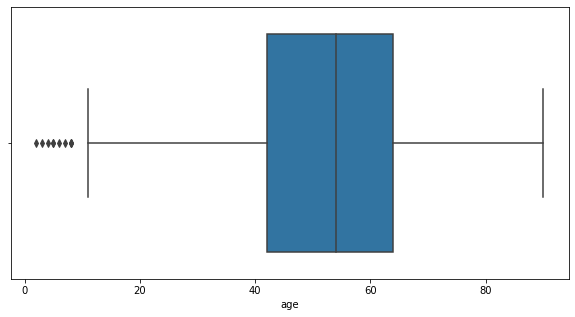

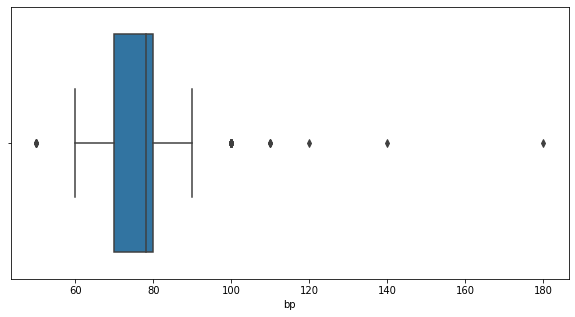

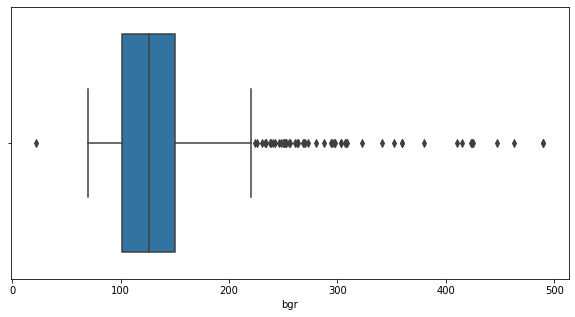

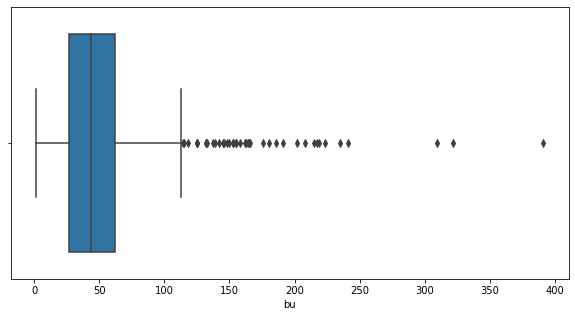

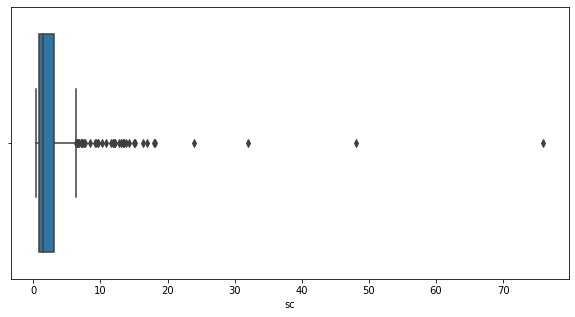

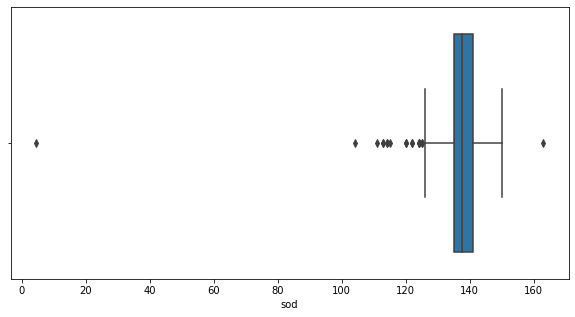

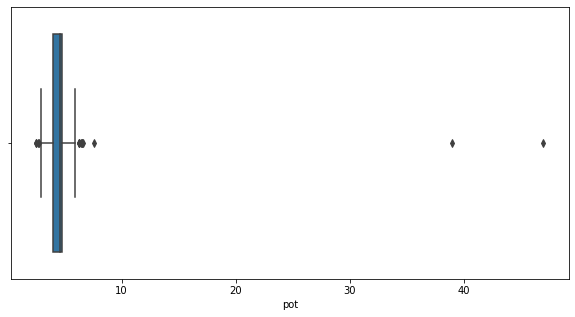

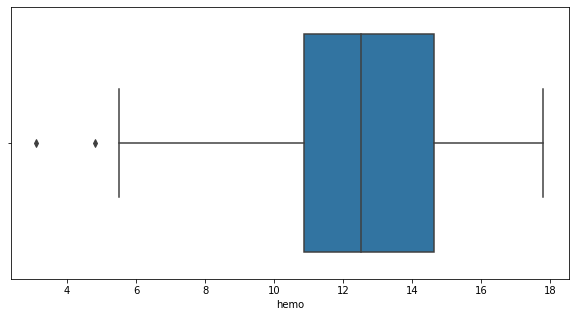

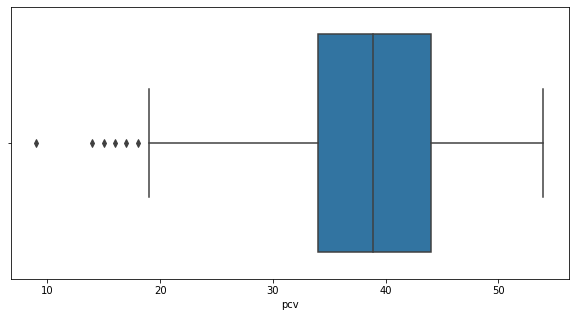

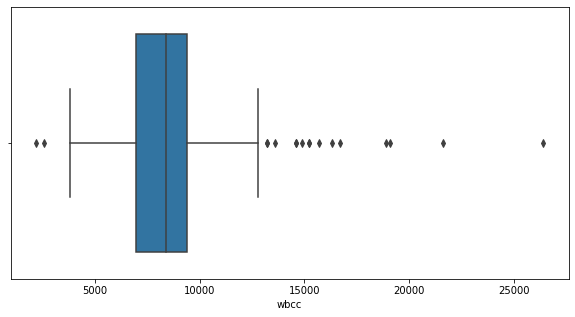

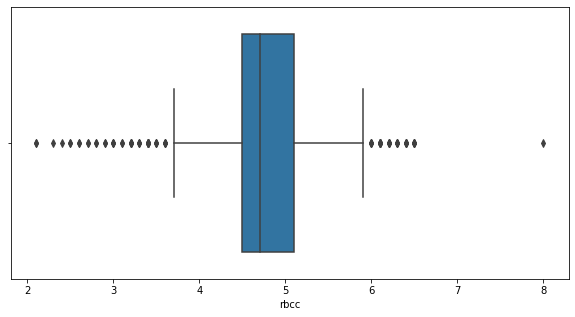

In [ ]:
for i in numecial_columns_list:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(i),data=ckd)

In [ ]:
# We will be changing the outliers into mean values
for column in numecial_columns_list:
    q1=ckd[column].quantile(0.25)
    q3=ckd[column].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-(1.5*iqr)
    upper_limit=q3+(1.5*iqr)
    ckd[column]=np.where(ckd[column]<lower_limit,lower_limit,ckd[column])
    ckd[column]=np.where(ckd[column]>upper_limit,upper_limit,ckd[column])

In [ ]:
ckd.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [ ]:
for i in numecial_columns_list:
    ckd[i].fillna(value=ckd[i].mean(),inplace=True)

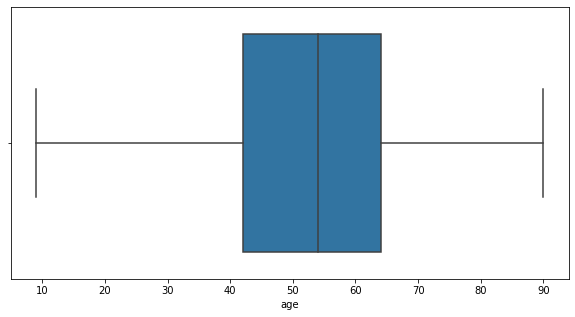

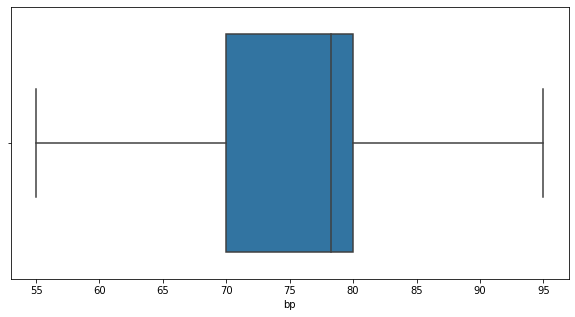

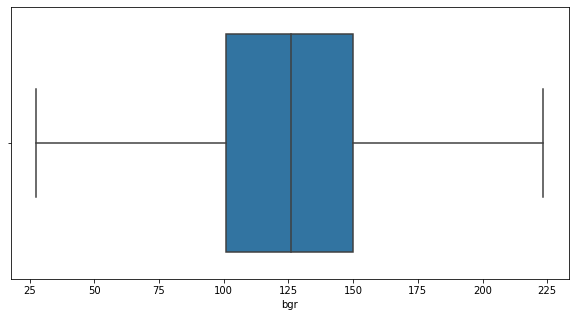

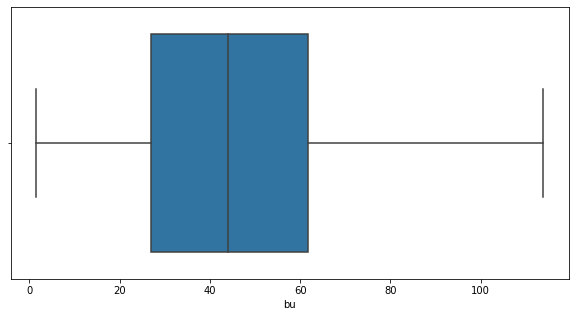

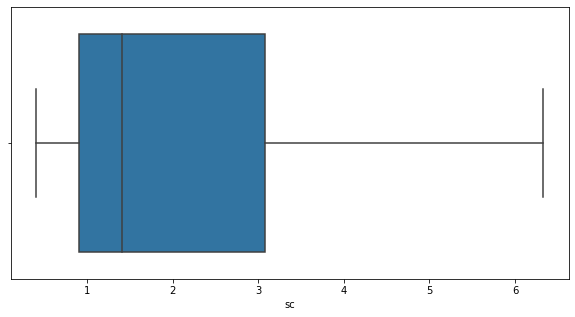

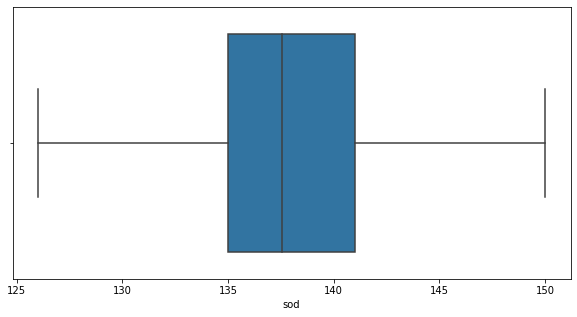

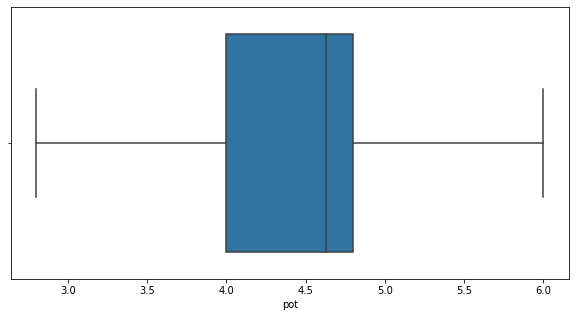

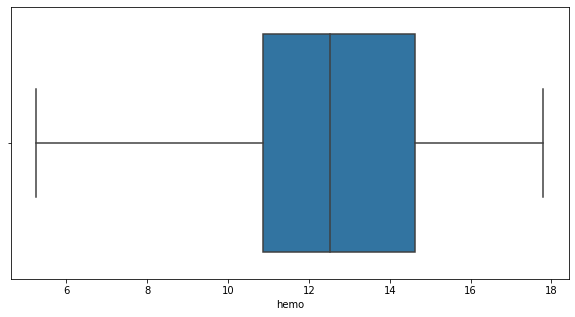

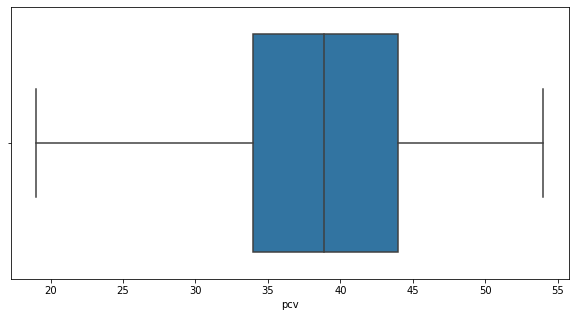

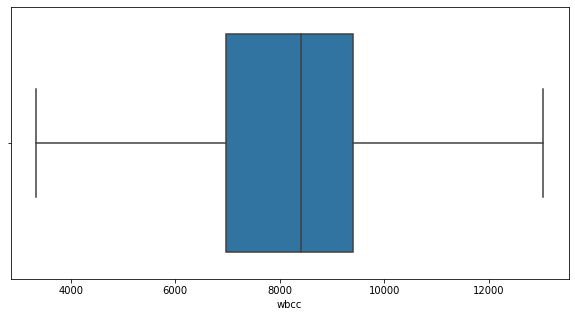

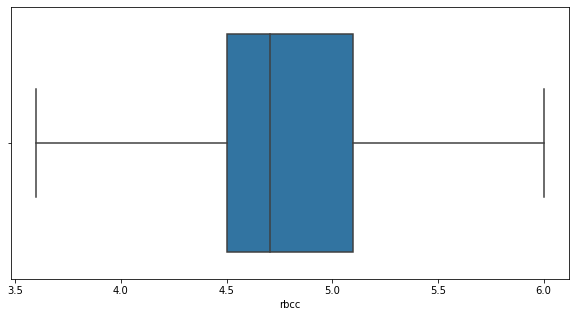

In [ ]:
for column in numecial_columns_list:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=ckd)

In [ ]:
ckd.shape

(400, 25)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

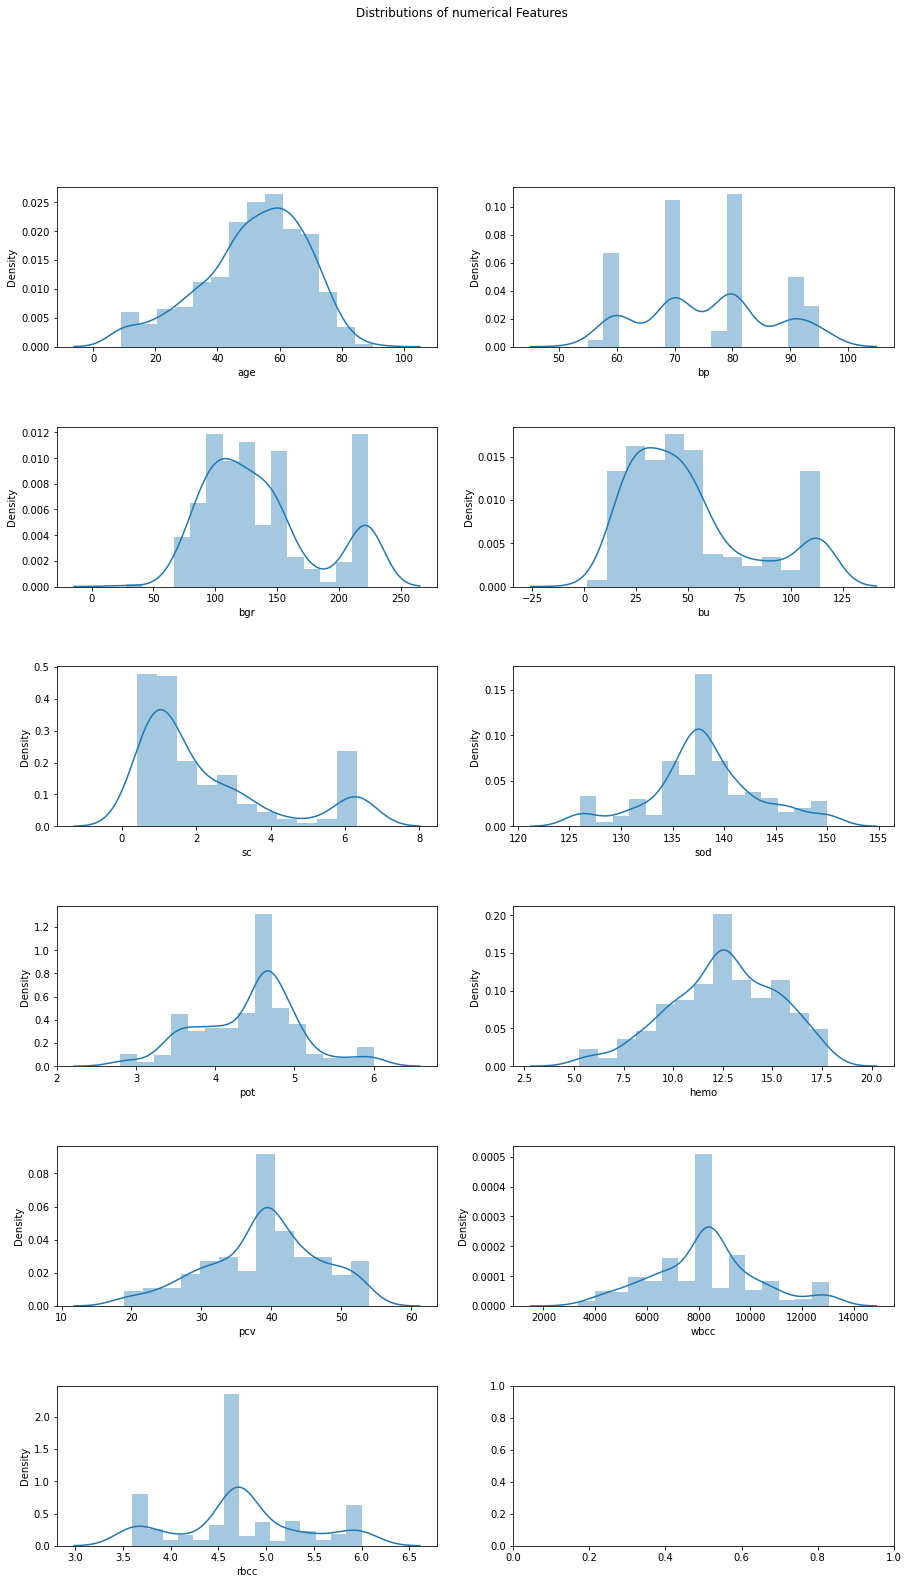

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15,25))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of numerical Features')


for i, j in zip(axes.flatten(), numecial_columns_list):
    sns.distplot(a=ckd[j], ax=i)

### Let's take care of the encoding of the categorical features

In [ ]:
for i in nominal_columns_list:
    print(f"{i} has {ckd[i].nunique()} categories\n")

sg has 5 categories

al has 6 categories

su has 6 categories

rbc has 2 categories

pc has 2 categories

pcc has 2 categories

ba has 2 categories

htn has 2 categories

dm has 2 categories

cad has 2 categories

appet has 2 categories

pe has 2 categories

ane has 2 categories

class has 2 categories



We can see from the values of the features that 'sg','al' and 'su' are in fact not categorical data but numerical and as such we will be transforming their values and they will be added to the numerical list

In [ ]:
ckd['sg'] = pd.to_numeric(ckd['sg'], errors='coerce')
ckd['al'] = pd.to_numeric(ckd['al'], errors='coerce')
ckd['su'] = pd.to_numeric(ckd['su'], errors='coerce')

Let's re-arrange the column lists accordingly

In [ ]:
# let's separate our features into numerical and categorical features accordingly
nominal_columns_list = []
numecial_columns_list = []

for i in ckd.columns:
    if ckd[i].dtypes == 'O': 
        nominal_columns_list.append(i)
    else:
        numecial_columns_list.append(i)

In [ ]:
print('The new numerical features: ', numecial_columns_list)
print('\nCategorical features: ', nominal_columns_list)

The new numerical features:  ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

Categorical features:  ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']


We can also notice that after taking care of the eccess numerical features, all the others only have 2 unique values and thus we can use the label encoder 

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in nominal_columns_list:
    ckd[i] = le.fit_transform(ckd[i])

In [ ]:
ckd

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1,0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,0,0,0,0
1,9.0,55.0,1.020,4,0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2,3,1,1,0,0,223.500000,...,31.0,7500.0,4.707435,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4,0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2,0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0,0,1,1,0,0,140.000000,...,47.0,6700.0,4.900000,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0,0,1,1,0,0,75.000000,...,54.0,7800.0,6.000000,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0,0,1,1,0,0,100.000000,...,49.0,6600.0,5.400000,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0,0,1,1,0,0,114.000000,...,51.0,7200.0,5.900000,0,0,0,0,0,0,1


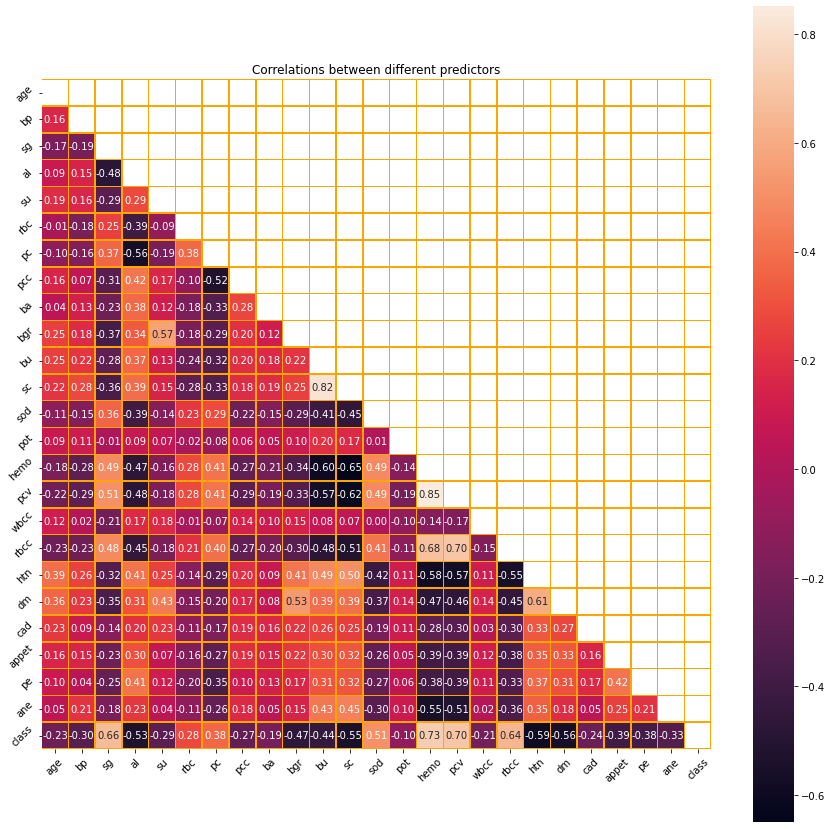

In [ ]:
corr_ckd = ckd.corr()
f,ax=plt.subplots(figsize=(15,15))
mask = np.zeros_like(corr_ckd)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_ckd,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange", mask = mask, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

In [ ]:
# let's start by splitting the data into feature and target
y = ckd['class']
x = ckd.drop(['class'], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_standarized = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [ ]:
X_standarized

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,-0.213326,0.391532,0.421486,0.076249,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.347722,...,1.064621,0.634622,-0.235168,0.683303,1.311903,1.385535,-0.304789,-0.507801,-0.484322,-0.420084
1,-2.544835,-1.894959,0.421486,2.363728,-0.380269,0.36489,0.484322,-0.342518,-0.241249,0.240394,...,-0.457824,-0.118936,-1.123124,-0.047476,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084
2,0.623626,0.391532,-1.421074,0.838742,2.507853,0.36489,0.484322,-0.342518,-0.241249,1.881924,...,-1.089082,-0.998087,-0.383161,-0.047476,-0.762252,1.385535,-0.304789,1.969276,-0.484322,2.380476
3,-0.213326,-0.523064,-2.342354,2.363728,-0.380269,0.36489,-2.064742,2.919556,-0.241249,-0.434732,...,-0.494957,-0.872494,-0.777808,-1.245402,1.311903,-0.721743,-0.304789,1.969276,2.064742,2.380476
4,-0.033979,0.391532,-1.421074,0.838742,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.674012,...,-0.346426,-0.495715,-0.481823,-0.206868,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.205150,0.391532,0.421486,-0.686244,-0.380269,0.36489,0.484322,-0.342518,-0.241249,0.065578,...,1.176020,1.011401,-0.777808,0.238217,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084
396,-0.572019,-0.523064,1.342766,-0.686244,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-1.348344,...,1.473082,1.890552,-0.235168,1.870198,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084
397,-2.365488,0.391532,0.421486,-0.686244,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.804527,...,1.213152,1.262587,-0.827139,0.980027,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084
398,-2.066576,-1.437660,1.342766,-0.686244,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.499990,...,0.619027,1.513773,-0.531154,1.721837,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084


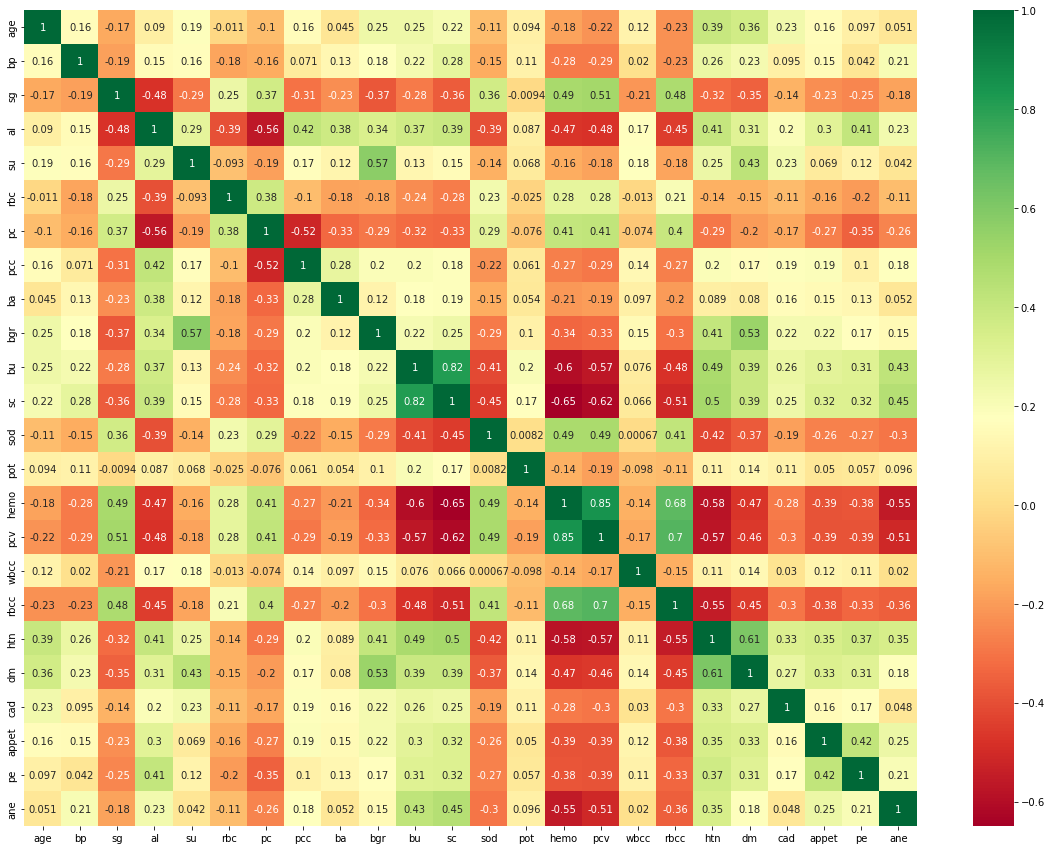

In [ ]:
corr =X_standarized.corr()
features = corr.index
plt.figure(figsize=(20,15))
ax = sns.heatmap(X_standarized[features].corr(),annot=True,cmap='RdYlGn')

Let's use Correlation-based Feature Selection (CFS) to do the feature selection

In [ ]:
from scipy.stats import pointbiserialr
from math import sqrt

def getMerit(subset, label):
    k = len(subset)

    # average feature-class correlation
    rcf_all = []
    for feature in subset:
        coeff = pointbiserialr( ckd[label], X_standarized[feature] )
        rcf_all.append( abs( coeff.correlation ) )
    rcf = np.mean( rcf_all )

    # average feature-feature correlation
    corr = ckd[subset].corr()
    corr.values[np.tril_indices_from(corr.values)] = np.nan
    corr = abs(corr)
    rff = corr.unstack().mean()

    return (k * rcf) / sqrt(k + k * (k-1) * rff)

In [ ]:
label = 'class'
features = X_standarized.columns.tolist()
#features.remove(label)
best_value = -1
best_feature = ''
for feature in x.columns:
    coeff = pointbiserialr( ckd[label], X_standarized[feature] )
    abs_coeff = abs( coeff.correlation )
    if abs_coeff > best_value:
        best_value = abs_coeff
        best_feature = feature

print("Feature %s with merit %.4f"%(best_feature, best_value))

Feature hemo with merit 0.7331


In [ ]:
class PriorityQueue:
    def  __init__(self):
        self.queue = []

    def isEmpty(self):
        return len(self.queue) == 0
    
    def push(self, item, priority):
        """
        item already in priority queue with smaller priority:
        -> update its priority
        item already in priority queue with higher priority:
        -> do nothing
        if item not in priority queue:
        -> push it
        """
        for index, (i, p) in enumerate(self.queue):
            if (set(i) == set(item)):
                if (p >= priority):
                    break
                del self.queue[index]
                self.queue.append( (item, priority) )
                break
        else:
            self.queue.append( (item, priority) )
        
    def pop(self):
        # return item with highest priority and remove it from queue
        max_idx = 0
        for index, (i, p) in enumerate(self.queue):
            if (self.queue[max_idx][1] < p):
                max_idx = index
        (item, priority) = self.queue[max_idx]
        del self.queue[max_idx]
        return (item, priority)

In [ ]:
# initialize queue
queue = PriorityQueue()

# push first tuple (subset, merit)
queue.push([best_feature], best_value)

In [ ]:
# list for visited nodes
visited = []

# counter for backtracks
n_backtrack = 0

# limit of backtracks
max_backtrack = 20

In [ ]:
# repeat until queue is empty
# or the maximum number of backtracks is reached
while not queue.isEmpty():
    # get element of queue with highest merit
    subset, priority = queue.pop()
    
    # check whether the priority of this subset
    # is higher than the current best subset
    if (priority < best_value):
        n_backtrack += 1
    else:
        best_value = priority
        best_subset = subset

    # goal condition
    if (n_backtrack == max_backtrack):
        break
    
    # iterate through all features and look of one can
    # increase the merit
    for feature in features:
        temp_subset = subset + [feature]
        
        # check if this subset has already been evaluated
        for node in visited:
            if (set(node) == set(temp_subset)):
                break
        # if not, ...
        else:
            # ... mark it as visited
            visited.append( temp_subset )
            # ... compute merit
            merit = getMerit(temp_subset, label)
            # and push it to the queue
            queue.push(temp_subset, merit)

In [ ]:
X=X_standarized[best_subset]

In [ ]:
X

,hemo,sg,dm,pcv,al,rbcc,bgr,sod
0,1.064621,0.421486,1.385535,0.634622,0.076249,0.683303,-0.347722,-0.111144
1,-0.457824,0.421486,-0.721743,-0.118936,2.363728,-0.047476,0.240394,-0.111144
2,-1.089082,-1.421074,1.385535,-0.998087,0.838742,-0.047476,1.881924,-0.111144
3,-0.494957,-2.342354,-0.721743,-0.872494,2.363728,-1.245402,-0.434732,-2.296809
4,-0.346426,-1.421074,-0.721743,-0.495715,0.838742,-0.206868,-0.674012,-0.111144
...,...,...,...,...,...,...,...,...
395,1.176020,0.421486,-0.721743,1.011401,-0.686244,0.238217,0.065578,2.253203
396,1.473082,1.342766,-0.721743,1.890552,-0.686244,1.870198,-1.348344,0.546949
397,1.213152,0.421486,-0.721743,1.262587,-0.686244,0.980027,-0.804527,-0.211387
398,0.619027,1.342766,-0.721743,1.513773,-0.686244,1.721837,-0.499990,-0.590554


now let's modelize

In [ ]:
# Train/test set generation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standarized[best_subset], y, test_size=0.25, random_state=97624)

The article depicted three primary algorithms: SVM, kNN and NB

Training Accuracy of SVM is 0.9933333333333333
Test Accuracy of SVM is 0.99 

Confusion Matrix of training set:- 
[[188   1]
 [  1 110]]

Confusion Matrix testing set:- 
[[61  0]
 [ 1 38]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      0.97      0.99        39

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

AUC of SVM Classifier is 0.9871794871794872


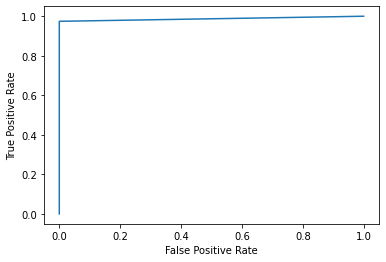

1.00 accuracy with a standard deviation of 0.00


In [ ]:
# let's apply SVM
svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)
#prediction phase
ypred_svc = svc.predict(X_test)

# accuracy score, confusion matrix, classification report and AUC score of SVM
svc_acc = accuracy_score(y_test, ypred_svc)
print(f"Training Accuracy of SVM is {accuracy_score(y_train, svc.predict(X_train))}")
print(f"Test Accuracy of SVM is {svc_acc} \n")

print(f"Confusion Matrix of training set:- \n{confusion_matrix(y_train, svc.predict(X_train))}\n")
print(f"Confusion Matrix testing set:- \n{confusion_matrix(y_test, ypred_svc)}\n")
print(f"Classification Report :- \n {classification_report(y_test, ypred_svc)}")
print("AUC of SVM Classifier is", roc_auc_score(y_test, ypred_svc))


#create ROC curve
fpr, tpr, _ = roc_curve(y_test,  ypred_svc)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc, X_test, ypred_svc, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Training Accuracy of KNN is 0.9933333333333333
Test Accuracy of KNN is 0.97 

Confusion Matrix of training set:- 
[[188   1]
 [  1 110]]

Confusion Matrix testing set:- 
[[59  2]
 [ 1 38]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98        61
           1       0.95      0.97      0.96        39

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

AUC of KNN Classifier is 0.9707860445565364


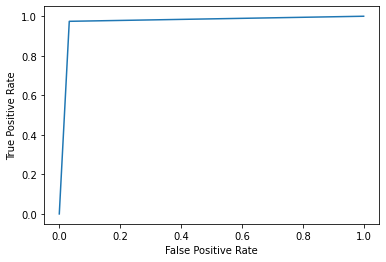

0.99 accuracy with a standard deviation of 0.03


In [ ]:
#let's apply KNN

knn =  KNeighborsClassifier()
knn.fit(X_train, y_train)
#predition phase
ypred_knn=knn.predict(X_test)
# accuracy score, confusion matrix, classification report and AUC score of knn
knn_acc = accuracy_score(y_test, ypred_knn)

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix of training set:- \n{confusion_matrix(y_train, knn.predict(X_train))}\n")
print(f"Confusion Matrix testing set:- \n{confusion_matrix(y_test, ypred_knn)}\n")
print(f"Classification Report :- \n {classification_report(y_test, ypred_knn)}")
print("AUC of KNN Classifier is", roc_auc_score(y_test, ypred_knn))

#create ROC curve
fpr, tpr, _ = roc_curve(y_test,  ypred_knn)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_test, ypred_knn, cv=10, scoring='f1_macro')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Training Accuracy of NB is 0.9133333333333333
Test Accuracy of NB is 0.93 

Confusion Matrix of training set:- 
[[163  26]
 [  0 111]]

Confusion Matrix testing set:- 
[[54  7]
 [ 0 39]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        61
           1       0.85      1.00      0.92        39

    accuracy                           0.93       100
   macro avg       0.92      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100

AUC of NB Classifier is 0.9426229508196721


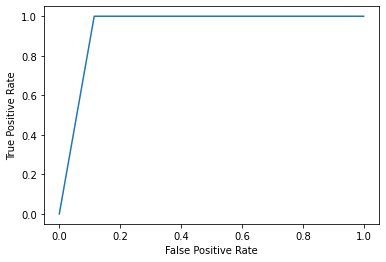

0.98 accuracy with a standard deviation of 0.04


In [ ]:
#let's apply Naive b
nb = GaussianNB()
nb.fit(X_train, y_train)
#predition phase
ypred_nb=nb.predict(X_test)
# accuracy score, confusion matrix, classification report and AUC score of NB
nb_acc = accuracy_score(y_test, ypred_nb)

print(f"Training Accuracy of NB is {accuracy_score(y_train, nb.predict(X_train))}")
print(f"Test Accuracy of NB is {nb_acc} \n")

print(f"Confusion Matrix of training set:- \n{confusion_matrix(y_train, nb.predict(X_train))}\n")
print(f"Confusion Matrix testing set:- \n{confusion_matrix(y_test, ypred_nb)}\n")
print(f"Classification Report :- \n {classification_report(y_test, ypred_nb)}")
print("AUC of NB Classifier is", roc_auc_score(y_test, ypred_nb))

#create ROC curve
fpr, tpr, _ = roc_curve(y_test,  ypred_nb)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, X_test, ypred_nb, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Then they used these classifiers as weak estimator in AdaBoost

Training Accuracy of Adaboost with SVM is 0.9866666666666667
Test Accuracy of Adaboost with SVM is 0.97 

Confusion Matrix of training set:- 
[[187   2]
 [  2 109]]

Confusion Matrix testing set:- 
[[58  3]
 [ 0 39]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        61
           1       0.93      1.00      0.96        39

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100

AUC of Adaboost with SVM Classifier is 0.9754098360655737


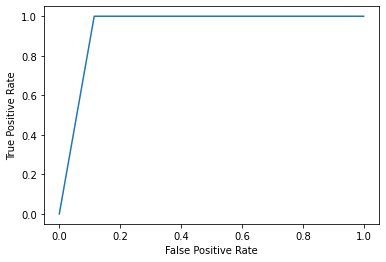

0.96 accuracy with a standard deviation of 0.07


In [ ]:
# AdaBoost with SVM
from sklearn.ensemble import AdaBoostClassifier
svc = SVC(kernel="linear")
adaclf = AdaBoostClassifier(base_estimator = svc, random_state=845, algorithm='SAMME', n_estimators =100, learning_rate=1)
adaclf.fit(X_train, y_train)
#predition phase
ypred_ada_svm=adaclf.predict(X_test)
# accuracy score, confusion matrix, classification report and AUC score of AdaBoost with SVM
nb_acc = accuracy_score(y_test, ypred_ada_svm)
print(f"Training Accuracy of Adaboost with SVM is {accuracy_score(y_train, adaclf.predict(X_train))}")
print(f"Test Accuracy of Adaboost with SVM is {nb_acc} \n")

print(f"Confusion Matrix of training set:- \n{confusion_matrix(y_train, adaclf.predict(X_train))}\n")
print(f"Confusion Matrix testing set:- \n{confusion_matrix(y_test, ypred_ada_svm)}\n")
print(f"Classification Report :- \n {classification_report(y_test, ypred_ada_svm)}")
print("AUC of Adaboost with SVM Classifier is", roc_auc_score(y_test, ypred_ada_svm))

#create ROC curve
fpr, tpr, _ = roc_curve(y_test,  ypred_nb)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(adaclf, X_test, ypred_ada_svm, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Training Accuracy of Adaboost with NB is 0.9133333333333333
Test Accuracy of Adaboost with NB is 0.93 

Confusion Matrix of training set:- 
[[163  26]
 [  0 111]]

Confusion Matrix testing set:- 
[[54  7]
 [ 0 39]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        61
           1       0.85      1.00      0.92        39

    accuracy                           0.93       100
   macro avg       0.92      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100

AUC of Adaboost with NB Classifier is 0.9426229508196721


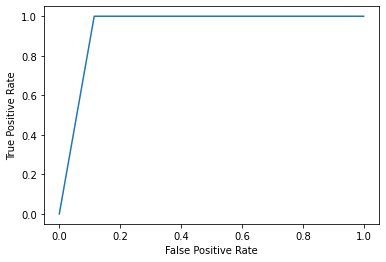

0.98 accuracy with a standard deviation of 0.04


In [ ]:
f# AdaBoost with SVM
from sklearn.ensemble import AdaBoostClassifier
adaclf = AdaBoostClassifier(base_estimator = nb, random_state=6, algorithm='SAMME', n_estimators =100, learning_rate=1)
adaclf.fit(X_train, y_train)
#predition phase
ypred_ada_nb=adaclf.predict(X_test)
# accuracy score, confusion matrix, classification report and AUC score of AdaBoost with NB
nb_acc = accuracy_score(y_test, ypred_ada_nb)
print(f"Training Accuracy of Adaboost with NB is {accuracy_score(y_train, adaclf.predict(X_train))}")
print(f"Test Accuracy of Adaboost with NB is {nb_acc} \n")

print(f"Confusion Matrix of training set:- \n{confusion_matrix(y_train, adaclf.predict(X_train))}\n")
print(f"Confusion Matrix testing set:- \n{confusion_matrix(y_test, ypred_ada_nb)}\n")
print(f"Classification Report :- \n {classification_report(y_test, ypred_ada_nb)}")
print("AUC of Adaboost with NB Classifier is", roc_auc_score(y_test, ypred_ada_nb))

#create ROC curve
fpr, tpr, _ = roc_curve(y_test,  ypred_nb)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(adaclf, X_test, ypred_ada_nb, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))